In [71]:
import numpy as np
import pandas as pd 
import scipy.optimize as opt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import timedelta
import scipy.stats as sps
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [72]:
cve = pd.read_csv('../cve/cve.csv', header=0, index_col=0)
#products = pd.read_csv('../cve/cve.csv', header=0, index_col=0)
#vendors = pd.read_csv('../cve/cve.csv', header=0, index_col=0)

cve.pub_date = pd.to_datetime(cve.pub_date)

#print(cve)

In [73]:
# общая статистика
X = cve.pub_date.dt.to_period('Q').sort_index().value_counts()
X.index = X.index.to_timestamp()
X = X.sort_index()
X[X.index] = np.cumsum(X.values)

# 2 Plots
# Left: cumulative, right rolling avg. growth rate
fig = make_subplots(rows=1,cols=2)
# Trace 1: Grey bars
fig.add_trace(
    go.Bar(
        x=X.index[:-16],
        y=X.values[:-16],
        marker_color="#E9EFC0",
    ),
    row=1,
    col=1
)

# Trace 2: Blue (emph) bars
fig.add_trace(
    go.Bar(
        x=X.index[-16:],
        y=X.values[-16:],
        marker_color="#B4E197"
    ), 
    row=1,
    col=1
)

# 
fig.update_layout(
    title=dict(
        text="Threat Proliferation",
        xref="paper",
        x=0., y=1.
    ),
    font=dict(
        family="Arial",
        size=14,
        color="#4E944F"
    ),
    xaxis=dict(
        showgrid=False
    ),
    yaxis=dict(
        showgrid=False
    ),annotations = [
        dict(
            ax=-80,
            ay=-100,
            x=X.index[-16],
            y=40000,
            text='55% of threats occur after 2016'
        )
    ],
    showlegend=False,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    bargap=0
)

fig.show()

# много графиков

In [74]:
# Authentication access
net = pd.get_dummies(cve.access_vector.dropna()).groupby(cve.pub_date.dt.to_period('Y')).mean().NETWORK
loc = pd.get_dummies(cve.access_vector.dropna()).groupby(cve.pub_date.dt.to_period('Y')).mean().LOCAL
adj = pd.get_dummies(cve.access_vector.dropna()).groupby(cve.pub_date.dt.to_period('Y')).mean().ADJACENT_NETWORK

traces = [
    [net, loc, adj],
]

texts = [
    ['Network', 'Local', 'Adj. Network'],
]

colors = ['#125B50', '#FF6363', '#F8B400']

fig = make_subplots(
    rows=3, 
    cols=2, 
    subplot_titles=[
        'Attack vector',
])

In [75]:
for i, (t, txt) in enumerate(zip(traces, texts)):
    for ndx, trace in enumerate(t):
        fig.add_trace(
            go.Scatter(
                x = [trace.index.to_timestamp()[-1]],
                y = [trace[-1]],
                name = "",
                text = " {}% {}".format(np.round(trace[-1] * 100, 1), txt[ndx]),
                textposition='middle right',
                mode='text',
                cliponaxis=False
            ),
            row=i%3 + 1,
            col=i//3 + 1,
        )
        
        fig.add_trace(
            go.Scatter(
                x = trace.index.to_timestamp(),
                y = trace,
                name = "",
                line=dict(color=colors[ndx])
            ),
            row=i%3 + 1,
            col=i//3 + 1
        )

        fig.add_trace(
            go.Scatter(
                x = [trace.index.to_timestamp()[0]],
                y = [trace[0]],
                name = "",
                text = "{}% ".format(np.round(trace[0] * 100), 1),
                textposition='middle left',
                mode='text',
                cliponaxis=False
            ),
            row=i%3 + 1,
            col=i//3 + 1
        )

In [76]:
fig.update_layout(
    showlegend=False,
    height=1300,
    title=dict(
        text="Access and impact",
    ),
    font=dict(
        family="Arial",
        size=12,
        color="#586e75"
    ),
    #color
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)



# эксплойты

In [77]:
fig = go.Figure()
X = pd.get_dummies(
        cve.cwe_name[cve.cwe_name.isin(cve.cwe_name.value_counts()[:10].index)]
    ).join(
        cve.pub_date
    ).groupby(
        cve.pub_date.dt.to_period("D")
).sum()

colors = ['#F900BF', '#cb4b16', '#268bd2', '#5F7161', '#2aa198', '#dc322f', '#85586F', '#9b9b9b', '#9772FB', '#733C3C']
X.index = X.index.to_timestamp()
X = X.divide(X.sum(axis=1), axis=0)

In [78]:
# One trace for each column
for ndx in range(X.shape[1]):
    data = X.iloc[:,ndx].rolling(365,axis=0).mean() 
    fig.add_trace(go.Scatter(
        x=data.index[365:],
        y=data.values[365:], 
        name=X.columns[ndx] if "'" not in X.columns[ndx] else X.columns[ndx].split("'")[1],
        marker_color=colors[ndx]
    ))

In [79]:
fig.update_layout(

    height=1100,
    font=dict(
        family="Arial",
        size=14,
        color="#586e75"
    ),
    xaxis=dict(
        showgrid=False,
    ),
    yaxis=dict(
        showgrid=False,
        showticklabels=False
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(x=0., y=1.)
)

fig.show()

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.01803303 0.01803303 0.01803303 ... 0.01181505 0.01181505 0.01165389]


c:\Users\sirj\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning:

Covariance of the parameters could not be estimated



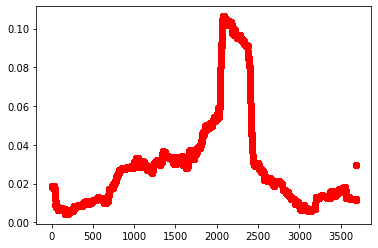

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.12371024 0.12371024 0.12425819 ... 0.02531542 0.02531542 0.02531542]


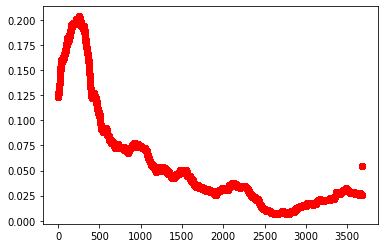

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.12726564 0.12726564 0.12781359 ... 0.19664655 0.19618992 0.19597121]


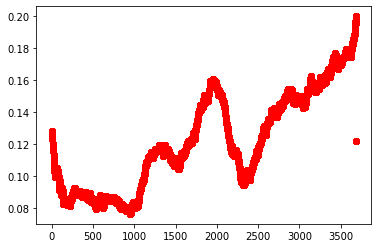

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.03768809 0.03768809 0.03768809 ... 0.05272372 0.05272372 0.05256256]


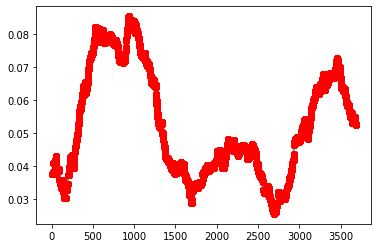

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.12321068 0.12321068 0.12321068 ... 0.30046609 0.29955284 0.30066946]


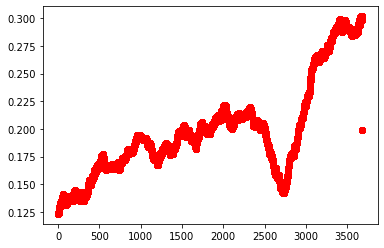

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.10182723 0.10182723 0.10182723 ... 0.07334511 0.07380174 0.07399743]


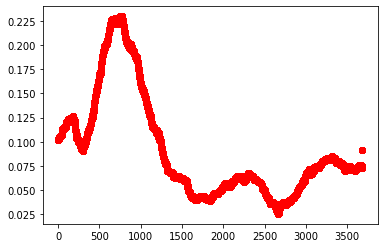

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.19662395 0.19662395 0.19771984 ... 0.15165122 0.15165122 0.15116774]


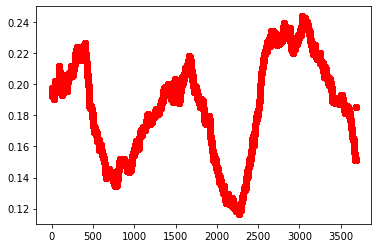

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.06188041 0.06051055 0.05777082 ... 0.12702641 0.12793965 0.12765187]


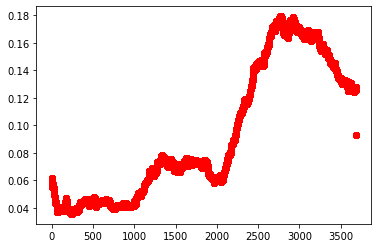

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.11023666 0.11023666 0.11078461 ... 0.0472411  0.0472411  0.0472411 ]


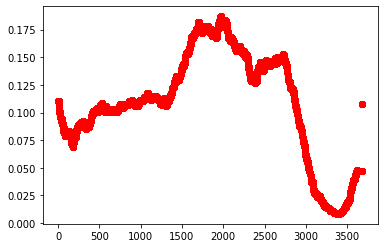

['2006-08-25T00:00:00.000000000' '2006-08-29T00:00:00.000000000'
 '2006-08-31T00:00:00.000000000' ... '2019-11-18T00:00:00.000000000'
 '2019-11-19T00:00:00.000000000' '2019-11-20T00:00:00.000000000']

[0.09952405 0.10089392 0.10089392 ... 0.01376932 0.01376932 0.01376932]


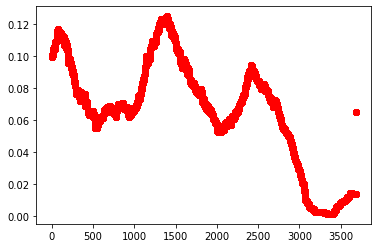

In [80]:
# хрен знает, как это из плота в фигур сунуть


def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

# One trace for each column
fig = go.Figure()
X = pd.get_dummies(
        cve.cwe_name[cve.cwe_name.isin(cve.cwe_name.value_counts()[:10].index)]
    ).join(
        cve.pub_date
    ).groupby(
        cve.pub_date.dt.to_period("D")
).sum()

colors = ['#F900BF', '#cb4b16', '#268bd2', '#5F7161', '#2aa198', '#dc322f', '#85586F', '#9b9b9b', '#9772FB', '#733C3C']
X.index = X.index.to_timestamp()
X = X.divide(X.sum(axis=1), axis=0)

#xx, yy = Null
for ndx in range(X.shape[1]):
    data = X.iloc[:,ndx].rolling(365,axis=0).mean() 
    fig.add_trace(go.Scatter(
        x=data.index[365:],
        y=data.values[365:],
        #xx = np.isnan()
        name=X.columns[ndx] if "'" not in X.columns[ndx] else X.columns[ndx].split("'")[1],
        marker_color=colors[ndx]
    ))

    #x=np.isnan(data.index[0:]).any()
    #y=np.isnan(data.values[0:]).any()
    x=data.index.values[365:]
    y=data.values[365:]
    print(x)
    print()
    print(y)
    fitting_parameters, covariance = curve_fit(exponential_fit, x, y)
    a, b, c = fitting_parameters


    
    for i in range(20):
        next_x = 2020
        next_y = exponential_fit(next_x, a, b, c)
        plt.plot(y)
        plt.plot(np.append(y, next_y), 'ro')
        next_x = +1

    plt.show()

